# College Dropout Rate Analysis


## The Code:

In [35]:
import pandas as pd
import seaborn
import sns
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

names = ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance',
         'Previous qualification', 'Nationality', 'Mother\'s qualification',
         'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
         'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
         'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'CU 1st sem (enrolled)',
         'CU 1st sem (approved)', 'CU 1st sem (evaluations)', 'CU 1st sem (grade)', 'CU 1st sem (credited)',
         'CU 1st sem (without evaluations)',
         'CU 2nd sem (credited)', 'CU 2nd sem (enrolled)', 'CU 2nd sem (evaluations)', 'CU 2nd sem (approved)',
         'CU 2nd sem (grade)',
         'CU 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Output']
# Load the data
df = pd.read_csv('data3.csv', names=names)

# create models
mylog_model = linear_model.LogisticRegression(max_iter=2000)  # linear regression model
myrf_model = RandomForestClassifier()  # random forest model
mysvm_model = svm.SVC(kernel='linear', probability=True)  # support vector machine model
mygb_model = GradientBoostingClassifier()  # GradientBoostingClassifier model
myxgb_model = xgb.XGBClassifier()  # xgboost model
ab_model = AdaBoostClassifier(algorithm='SAMME')  # AdaBoostClassifier model
et_model = ExtraTreesClassifier()  # ExtraTreesClassifier model

y = df.values[:, 34]
X = df.values[:, 0:34]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, )

# train the  models
mylog_model.fit(X_train, y_train)  # linear regression model
myrf_model.fit(X_train, y_train)  # random forest model
mysvm_model.fit(X_train, y_train)  # support vector machine model
mygb_model.fit(X_train, y_train)  # GradientBoostingClassifier model
myxgb_model.fit(X_train, y_train)  # xgboost model
ab_model.fit(X_train, y_train)  # AdaBoostClassifier model
et_model.fit(X_train, y_train)  # ExtraTreesClassifier model

# predict the outputs using the test data
y_pred = mylog_model.predict(X_test)  # linear regression model
y_pred_rf = myrf_model.predict(X_test)  # random forest model
y_pred_svm = mysvm_model.predict(X_test)  # support vector machine model
y_pred_gb = mygb_model.predict(X_test)  # GradientBoostingClassifier model
y_pred_xgb = myxgb_model.predict(X_test)  # xgboost model
y_pred_ab = ab_model.predict(X_test)  # AdaBoostClassifier model
y_pred_et = et_model.predict(X_test)  # ExtraTreesClassifier model

# print out  the prediction of the same output for all the models
dataset = [
    [1, 6, 1, 11, 1, 1, 1, 1, 3, 4, 4, 1, 0, 0, 0, 1, 0, 19, 0, 6, 6, 6, 14, 0, 0, 0, 6, 6, 6, 13.66666667, 0, 13.9,
     -0.3, 0.79]]

# create variables to store the prediction of the output for all the models
linear_prediction = mylog_model.predict(dataset)
random_forest_prediction = myrf_model.predict(dataset)
svm_prediction = mysvm_model.predict(dataset)
gbc_prediction = mygb_model.predict(dataset)
xgboost_prediction = myxgb_model.predict(dataset)
ab_prediction = ab_model.predict(dataset)
et_prediction = et_model.predict(dataset)

print("linear regression predicts:", linear_prediction, "and has an accuracy of:",
      mylog_model.score(X_test, y_test))
print("random forest predicts:", random_forest_prediction, "and has an accuracy of:",
      myrf_model.score(X_test, y_test))
print("support vector machine predicts:", svm_prediction, "and has an accuracy of:",
      mysvm_model.score(X_test, y_test))
print("GradientBoostingClassifier predicts:", gbc_prediction, "and has an accuracy of:",
      mygb_model.score(X_test, y_test))
print("xgboost predicts:", xgboost_prediction, "and has an accuracy of:", myxgb_model.score(X_test, y_test))
print("AdaBoost predicts:", ab_prediction, "and has an accuracy of:", ab_model.score(X_test, y_test))
print("Extra Trees predicts:", et_prediction, "and has an accuracy of:", et_model.score(X_test, y_test))

# print out the accuracy of the models
voting_clf = VotingClassifier(estimators=[('lr', mylog_model), ('rf', myrf_model), ('svm', mysvm_model),
                                          ('gbc', mygb_model), ('xgb', myxgb_model), ('ab', ab_model),
                                          ('et', et_model)], voting='soft')
voting_clf.fit(X_train, y_train)

print("Voting Classifier predicts:", voting_clf.predict(dataset), "and has an accuracy of:",
      voting_clf.score(X_test, y_test))


linear regression predicts: [1.] and has an accuracy of: 0.9201101928374655
random forest predicts: [1.] and has an accuracy of: 0.9017447199265382
support vector machine predicts: [0.] and has an accuracy of: 0.9237832874196511
GradientBoostingClassifier predicts: [1.] and has an accuracy of: 0.9081726354453628
xgboost predicts: [1] and has an accuracy of: 0.8980716253443526
AdaBoost predicts: [1.] and has an accuracy of: 0.9044995408631772
Extra Trees predicts: [1.] and has an accuracy of: 0.9146005509641874
Voting Classifier predicts: [1.] and has an accuracy of: 0.9173553719008265


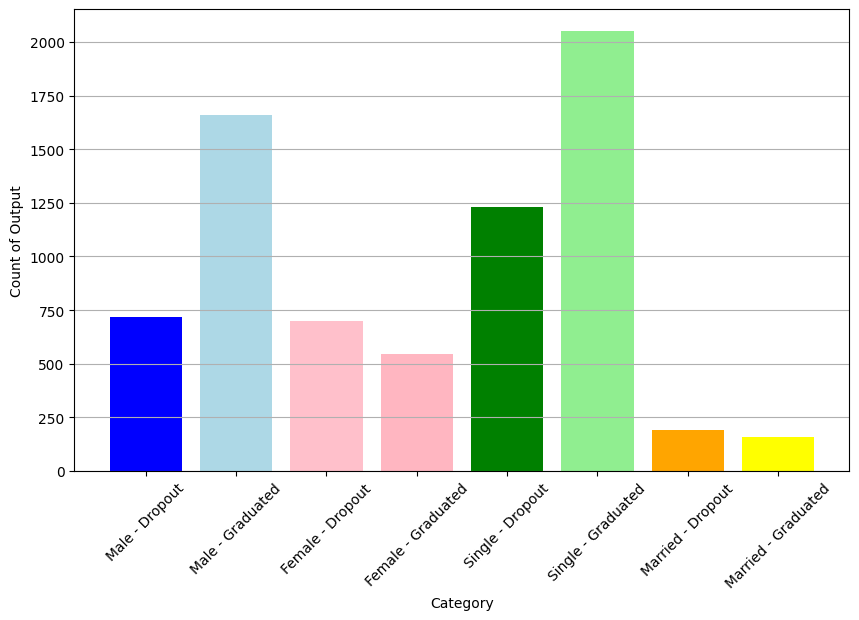

In [46]:
from matplotlib import pyplot as plt

# Filter out rows where Output is 2
filtered_data = df[df['Output'] != 2]

# Calculate the number of times Output was 0 and 1 for Male and Female
filtered_output_count = filtered_data.groupby(['Gender', 'Output'])['Output'].count().unstack(fill_value=0)

# Define marital status groups
single_status = [1, 3, 4, 6]
married_status = [2, 5]

# Calculate the number of times Output was 0 and 1 for Single and Married
single_output_count_filtered = filtered_data[filtered_data['Marital status'].isin(single_status)].groupby('Output')['Output'].count()
married_output_count_filtered = filtered_data[filtered_data['Marital status'].isin(married_status)].groupby('Output')['Output'].count()

# Create a bar chart for the number of times Output was 0 and 1 for Male, Female, Single, and Married
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Male - Dropout', 'Male - Graduated', 'Female - Dropout', 'Female - Graduated',  'Single - Dropout', 'Single - Graduated','Married - Dropout', 'Married - Graduated']
values = [
    filtered_output_count.loc[0, 0], filtered_output_count.loc[0, 1], 
    filtered_output_count.loc[1, 0], filtered_output_count.loc[1, 1], 
    single_output_count_filtered.get(0, 0), single_output_count_filtered.get(1, 0), 
    married_output_count_filtered.get(0, 0), married_output_count_filtered.get(1, 0)
]
colors = ['blue', 'lightblue', 'pink', 'lightpink', 'green', 'lightgreen', 'orange', 'yellow']

ax.bar(categories, values, color=colors)

# Customize the chart
ax.set_xlabel('Category')
ax.set_ylabel('Count of Output')
ax.grid(axis='y')
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


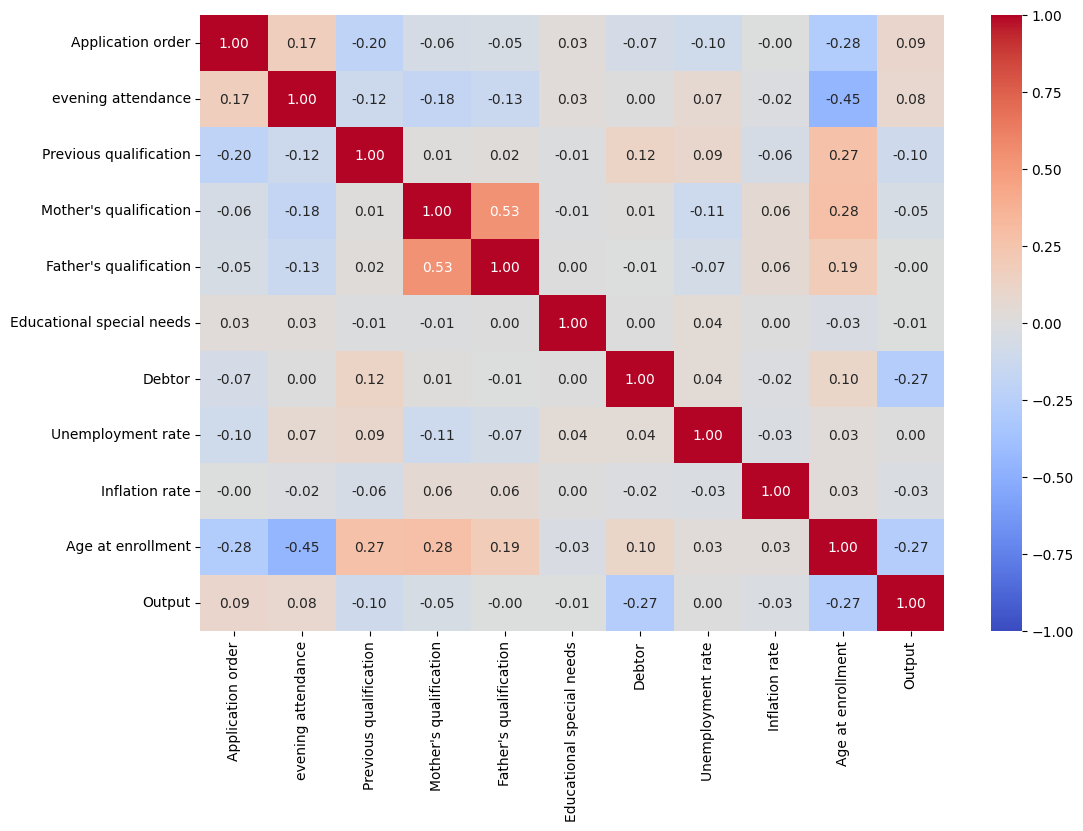

In [47]:
# Select relevant numeric columns for the new correlation matrix
selected_columns_new = [
    'Application order', 'evening attendance', 'Previous qualification', 
    'Mother\'s qualification', 'Father\'s qualification', 'Educational special needs', 
    'Debtor', 'Unemployment rate', 'Inflation rate', 'Age at enrollment', 'Output'
]
selected_data_new = df[selected_columns_new]

# Calculate the correlation matrix for the selected columns
corr_matrix_new = selected_data_new.corr()

# Create a heatmap for the new selected columns
plt.figure(figsize=(12, 8))
seaborn.heatmap(corr_matrix_new, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()

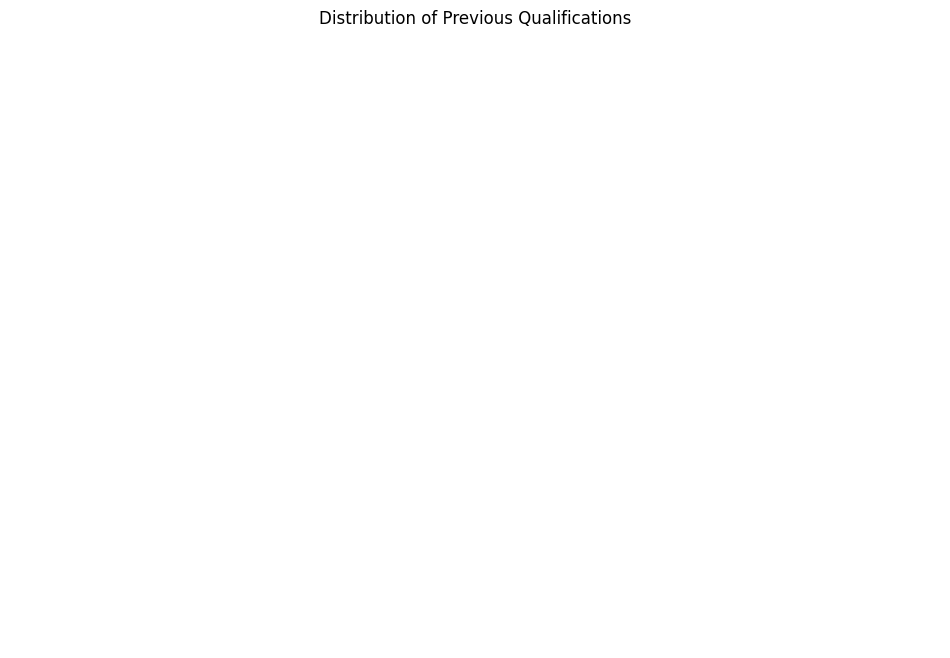

In [61]:
# Mapping of previous qualification codes to their descriptions
qualification_mapping = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Replace the codes in the 'Previous qualification' column with their descriptions
df['Previous qualification'] = df['Previous qualification'].map(qualification_mapping)

# Count the occurrences of each Previous qualification
previous_qualification_counts = df['Previous qualification'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(previous_qualification_counts, labels=previous_qualification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Previous Qualifications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()